In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import seaborn as sns
from IPython.display import display
pd.options.mode.chained_assignment = None
import matplotlib
matplotlib.style.use('ggplot')
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install vadersentiment
from google.colab import drive
drive.mount('/content/drive')
tweets = pd.read_csv('/content/drive/My Drive/dataset2.csv', nrows=500,encoding = "ISO-8859-1")

!pip install vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
display(tweets.head(3))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00
Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Unnamed: 0,text,Positive,Negative,Neutral,Compound,Sentiment
0,0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747,Positive
1,1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787,Positive
2,2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889,Positive


In [ ]:
import re

tweets['text_new'] = ''
tweets['tweetos'] = ''


for i in range(len(tweets['text'][:500])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(':')[i][0]
    except AttributeError:
        tweets['tweetos'][i] = 'other'


for i in range(len(tweets['text'][:500])):
    if tweets['tweetos'].str.contains('RT @')[i]  == False:
        tweets['tweetos'][i] = 'other'


for i in range(len(tweets['text'][:500])):
    m = re.search('(?<=:)(.*)', tweets['text'][i])
    if tweets['text'].str.contains('RT @')[i]  == True:
        try:
            tweets['text_new'][i]=m.group(0)
        except AttributeError:
            tweets['text_new'][i]=tweets['text'][i]
    else:
        tweets['text_new'][i] =  tweets['text'][i]

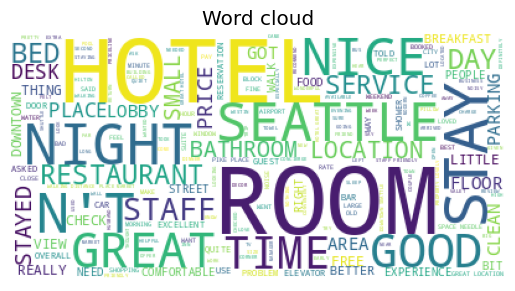

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("happy")
    stopwords.add("Sad")

    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Word cloud")

wordcloud_by_province(tweets)

In [ ]:
print(tweets['text'].describe())

count                                                   500
unique                                                  500
top       nice hotel expensive parking got good deal sta...
freq                                                      1
Name: text, dtype: object


In [ ]:
tweets.describe()

,Unnamed: 0,Positive,Negative,Neutral,Compound
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.286790,0.080542,0.632666,0.711990
std,144.481833,0.127889,0.073966,0.102234,0.547175
min,0.000000,0.000000,0.000000,0.272000,-0.990200
25%,124.750000,0.191750,0.026000,0.565000,0.833825
50%,249.500000,0.283000,0.070000,0.645500,0.958800
75%,374.250000,0.368000,0.115000,0.704000,0.983625
max,499.000000,0.728000,0.544000,0.886000,0.998700


In [ ]:
tweets['nb_words'] = 0
for i in range(len(tweets['text'])):
    tweets['nb_words'][i] = len(tweets['text'][i].split(' '))

In [ ]:
t=tweets['Sentiment'].value_counts()
t

Positive    437
Negative     62
Neutral       1
Name: Sentiment, dtype: int64

<Axes: >

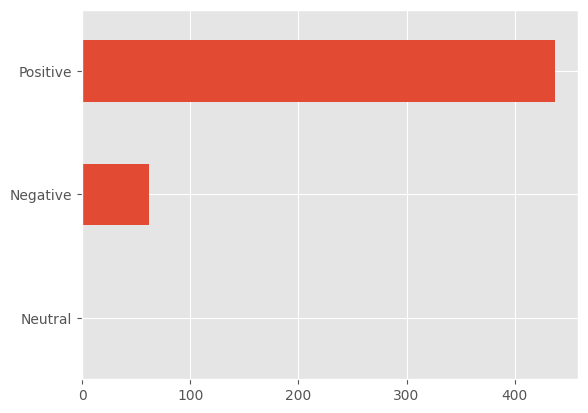

In [ ]:
t.sort_values().plot(kind = 'barh')

In [ ]:
def get_stop_words(s, n):

	from collections import Counter
	l = get_corpus(s)
	l = [x for x in Counter(l).most_common(n)]
	return l

def get_corpus(s):

	l = []
	s.map(lambda x: l.extend(x))
	return l


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer

tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text_new']]

vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
print(X.shape)


(500, 709)


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

In [ ]:
km.fit(X)
terms = vectorizer.get_feature_names_out()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster %d:" %i, end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind], end='')
    print()

cluster 0: desk did service night rooms told time like just reservation
cluster 1: market place location pike nice seattle center blocks downtown good
cluster 2: staff seattle location good rooms friendly floor really helpful stayed
cluster 3: large small comfortable lobby clean bed staff friendly enjoyed stayed
cluster 4: nice bed stayed night reviews conference comfortable rooms did bathroom


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pos = pca.fit_transform(dist)
xs, ys = pos[:,0], pos[:,1]

In [ ]:

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}#, 5: '#8A2BE2', 6: '#E9967A'}

cluster_names = {0: 'cluster 1',
                 1: 'cluster 2',
                 2: 'cluster 3',
                 3: 'cluster 4',
                 4: 'cluster 5'}
                 #5: 'cluster 6',
                 #6: 'cluster 7'}
clusters = km.labels_.tolist()

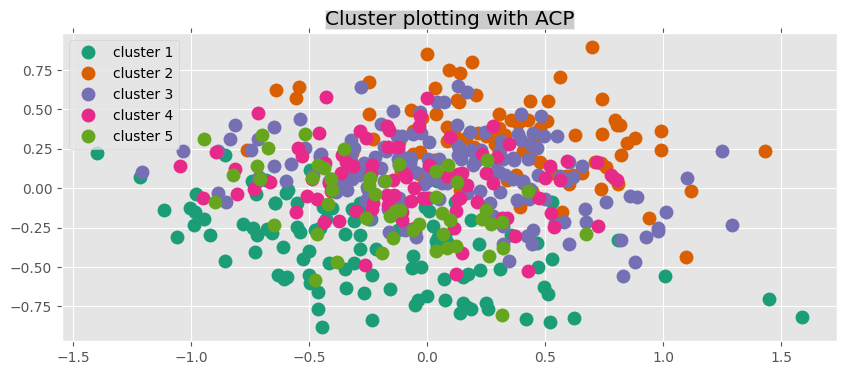

In [ ]:

%matplotlib inline

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=''))


groups = df.groupby('label')



fig, ax = plt.subplots(figsize=(10, 4)) # set size
ax.margins(0.05)


for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10,
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')

ax.legend(numpoints=1)
plt.title('Cluster plotting with ACP', bbox={'facecolor':'0.8', 'pad':0})

for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=5)



plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,text,Positive,Negative,Neutral,Compound,Sentiment,text_new,tweetos,nb_words,text_lem,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747,Positive,nice hotel expensive parking got good deal sta...,other,89,nice hotel expensive parking got good deal sta...,0.9747,0.643,0.072,0.285,POSITIVE
1,1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787,Positive,ok nothing special charge diamond member hilto...,other,252,ok nothing special charge diamond member hilto...,0.9830,0.695,0.109,0.197,POSITIVE
2,2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889,Positive,nice rooms not 4* experience hotel monaco seat...,other,219,nice rooms not experience hotel monaco seat...,0.9906,0.665,0.092,0.243,POSITIVE
3,3,"unique, great stay, wonderful time hotel monac...",0.385,0.060,0.555,0.9912,Positive,"unique, great stay, wonderful time hotel monac...",other,91,unique great stay wonderful time hotel monac...,0.9946,0.546,0.017,0.437,POSITIVE
4,4,"great stay great stay, went seahawk game aweso...",0.221,0.135,0.643,0.9797,Positive,"great stay great stay, went seahawk game aweso...",other,193,great stay great stay went seahawk game aweso...,0.9906,0.628,0.107,0.265,POSITIVE


In [ ]:
from  sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


tweets_num_mod = tweets[tweets.select_dtypes(exclude=['object']).columns.values]


In [ ]:

X,y=(tweets_num_mod)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
ac=[]

ValueError: ignored

In [ ]:
from keras import layers
from keras.models import Sequential

model = Sequential()
model.add(layers.Dense(20, input_dim=4, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam')
model.summary()
classifier_nn = model.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)
ac.append(accuracy_score(classifier_nn,y_test,sample_weight=0.2)*100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1024)              11264     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                        

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test,sample_weight=0.8)*100)

NameError: ignored

In [ ]:

def predict(s):
    model=SentimentIntensityAnalyzer()
    scores=model.polarity_scores(s)
    c=comp(scores)
    return c
def comp(scores):
    if(scores['neg']>scores['pos'] and scores['neg']>scores['neu'] ):
        return "Predicted as depressed or sad tweet"

    elif(scores['pos']>scores['neg'] and scores['pos']>scores['neu'] ):
        return "Predicted as happy tweet"
    else:
        return "Neutral tweet"

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('seaborn')
x=['CNN','SVM']

ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')

print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)
import pandas as pd
data={'Agorithms':x,
     "accuracy":ac}
df=pd.DataFrame(data)
df.head()

<ipython-input-28-39b49d3d8786>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


NameError: ignored

In [ ]:
predict("i am happy and enjoying day with my dog")

'Predicted as happy tweet'